<a href="https://colab.research.google.com/github/Pradeep24032004/Customer_Segmentation/blob/main/Customer_Segmentation(K_Mean_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#we need to cluster the customers into various groups as some customers tend to buy more, and some may not we need to cluster them into groups
#clustering comes under unsupervised machine learning
'''
Steps involved
1.Get data
2.Data pre processing
3.Analyse the data and features important for us
4.choose correct number of clusters- we find k value by sum of squared method also called elbow method algorithm(optimim no of customers)
5.feed the data to k-means clustering algorithm
6.cisualize the clusters and group the customers
'''

'\nSteps involved\n1.Get data\n2.Data pre processing\n3.Analyse the data and features important for us\n4.choose correct number of clusters- we find k value by sum of squared method also called elbow method algorithm(optimim no of customers)\n5.feed the data to k-means clustering algorithm\n6.cisualize the clusters and group the customers\n'

In [ ]:
#importing the dependencies(libraries and functions)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #data visualization libraries
import seaborn as sns   #data visualization libraries
from sklearn.cluster import KMeans


In [ ]:
#Data collection and analysis
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/datascience
%pwd
%ls

/content/drive/My Drive/datascience
'car data.csv'   mail_data.csv              sonar.csv               winequality-red.csv
 data.csv        Mall_Customers.csv         spam_ham_dataset.csv
 income.csv      nba.csv                    titanic.csv
 insurance.csv  'Sample - Superstore.xls'   USA_cars_datasets.csv


In [ ]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head() #here customer_data is the data frame
#spending score represensts the tendency of the customers of buying in that particular mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
#getting some information about the datset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.isnull().sum() #we dont have any missing values and no need of imputation

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#choosing annula income and spending score column for clustering
X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
#choosing the correct number of clusters(optimal k)
#WCSS - With in Clusters Sum of Squares (elbow method)
#finding the wcss values for different number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21862.092672182895, 19672.072849014323]


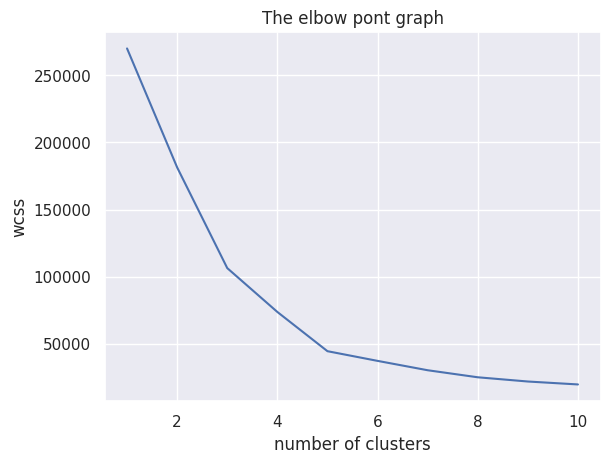

In [ ]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow pont graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#from the above graph we have two elbow points 3 and 5 . we choose 5 as elbow point as after 5 there is no elbow point after 5
#optimal number of clusters = 5
#Traing the k-means clustering model
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0)
#return a label for each data point based on their cluster
#first cluster as label 0, second cluster as label 1,......fifth cluster as label 4
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


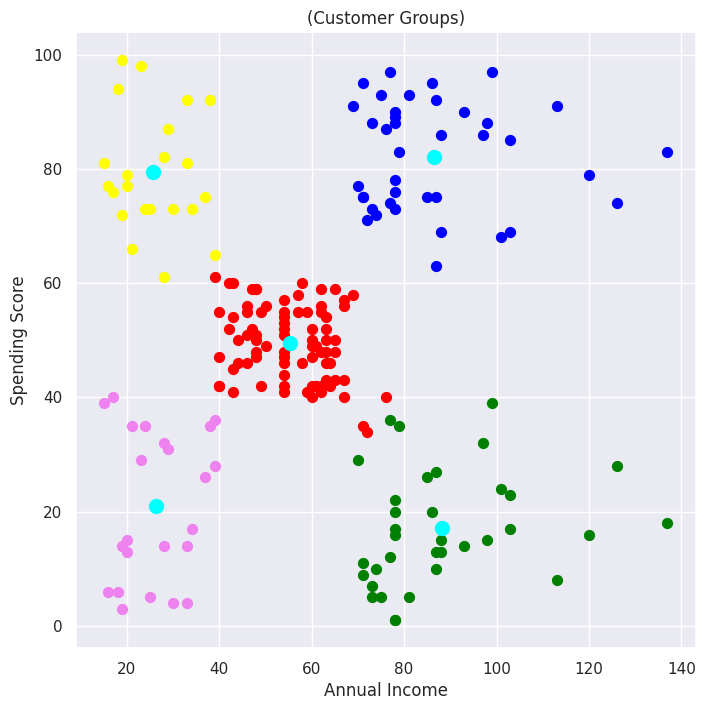

In [ ]:
#visualising all the clusters
#plotting all the clusters and their centroids
#Here the x axis will be the annual income and y axis will be the spending score and corresponding clusters will be plotted in x-y plane
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0, 0], X[Y==0,1], s=50, c='green', label='cluster1')# s represents the size of the data point
plt.scatter(X[Y==1, 0], X[Y==1,1], s=50, c='red', label='cluster2')
plt.scatter(X[Y==2, 0], X[Y==2,1], s=50, c='blue', label='cluster3')
plt.scatter(X[Y==3, 0], X[Y==3,1], s=50, c='yellow', label='cluster4')
plt.scatter(X[Y==4, 0], X[Y==4,1], s=50, c='violet', label='cluster5')
#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centrods')
plt.title('(Customer Groups)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()